In [1]:
import pandas as pd
import numpy as np
import warnings
warnings.filterwarnings("ignore")
import matplotlib.pylab as plt
import seaborn as sns
from wordcloud import WordCloud
from pickle import dump
from pickle import load
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
import spacy
from afinn import Afinn
from collections import Counter
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer
from sklearn.feature_extraction.text import TfidfTransformer
from imblearn.over_sampling import RandomOverSampler
from imblearn.over_sampling import SMOTE
from imblearn.under_sampling import RandomUnderSampler
from sklearn.model_selection import train_test_split, KFold, StratifiedKFold
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.naive_bayes import MultinomialNB
from sklearn import metrics
from sklearn.metrics import accuracy_score, classification_report, roc_auc_score, f1_score
from sklearn.model_selection import cross_val_score
from sklearn.metrics import plot_confusion_matrix, classification_report

In [2]:
def map_sentiment(rating):
    if rating <= 2:
        return 0 #negative review
    else:
        return 1 #positive review

df = pd.read_csv("../CSVInUse/PantaiInnReview.csv")
# drop duplicated index column
df = df.iloc[:, 1:]
df['Sentiment'] = [map_sentiment(x) for x in df['Rating']]
df.head(10)

,Customer_name,Rating,Review_Title,Review,Sentiment
0,plimina,5,Absolutely gorgeous,This place by far is the best kept secret in S...,1
1,mohd_shah,5,Awesoome,I chose to this at this hotel because of the l...,1
2,sassytraveler0125,5,Amazing hotel and staff!!!,My friend and I decided to go to Kota Kinabalu...,1
3,Andersonsabroad,3,Clean nice rooms but very noisy,"The hotel had 2 large beds, was clean but unfo...",1
4,lyc04,5,Clean and good location,This was my second time visiting your hotel. I...,1
5,Matt D,5,"Clean & Cheap, great location",Great central location across the road & round...,1
6,Dutch_traveler013,5,Excellent quality for money,We stayed with six people and all had clean ro...,1
7,Terence Tan,4,Basic Venue at the Heart of the city,The Hotel has really friendly staff. Near the ...,1
8,zarzadon,3,Basic hotel and value for money,Stayed here for 3 nights. Location is at Gaya ...,1
9,palma k,4,basic but nice,"Very basic hotel, but very clean and nice frie...",1


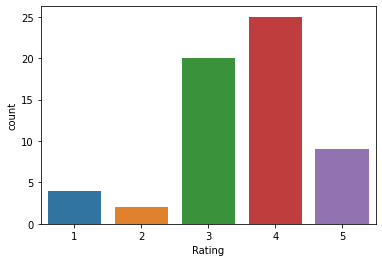

In [3]:
# generate barchart based on hotel ratings 
df = pd.read_csv("../CSVInUse/PantaiInnReview.csv")
sns.countplot(x ='Rating', data = df)
plt.show()

In [4]:
wordnet=WordNetLemmatizer()
stop_words=stopwords.words('english')
not_stopwords = ("aren", "aren't", "couldn", "couldn't", "didn", "didn't",
                 "doesn", "doesn't", "don", "don't", "hadn", "hadn't", "hasn",
                 "hasn't", "haven", "haven't", "isn", "isn't", "mustn",
                 "mustn't", "no", "not", "only", "shouldn", "shouldn't",
                 "should've", "wasn", "wasn't", "weren", "weren't", "will",
                 "wouldn", "wouldn't", "won't", "very")
stop_words_ = [words for words in stop_words if words not in not_stopwords]
stop_words_.append("I")
stop_words_.append("the")
stop_words_.append("s")
stop_words_.extend([
    "will", "always", "go", "one", "very", "good", "only", "mr", "lot", "two",
    "th", "etc", "don", "due", "didn", "since", "nt", "ms", "ok", "almost",
    "put", "pm", "till", "add", "let", "hotel", "able", "per", "st", 
    "couldn", "yet", "par", "hi", "well", "would", "I", "the", "s", 
    "also", "great", "get", "like", "take", "thank"
])
print(stop_words_)

['i', 'me', 'my', 'myself', 'we', 'our', 'ours', 'ourselves', 'you', "you're", "you've", "you'll", "you'd", 'your', 'yours', 'yourself', 'yourselves', 'he', 'him', 'his', 'himself', 'she', "she's", 'her', 'hers', 'herself', 'it', "it's", 'its', 'itself', 'they', 'them', 'their', 'theirs', 'themselves', 'what', 'which', 'who', 'whom', 'this', 'that', "that'll", 'these', 'those', 'am', 'is', 'are', 'was', 'were', 'be', 'been', 'being', 'have', 'has', 'had', 'having', 'do', 'does', 'did', 'doing', 'a', 'an', 'the', 'and', 'but', 'if', 'or', 'because', 'as', 'until', 'while', 'of', 'at', 'by', 'for', 'with', 'about', 'against', 'between', 'into', 'through', 'during', 'before', 'after', 'above', 'below', 'to', 'from', 'up', 'down', 'in', 'out', 'on', 'off', 'over', 'under', 'again', 'further', 'then', 'once', 'here', 'there', 'when', 'where', 'why', 'how', 'all', 'any', 'both', 'each', 'few', 'more', 'most', 'other', 'some', 'such', 'nor', 'own', 'same', 'so', 'than', 'too', 's', 't', 'can'

In [5]:
nlp=spacy.load('en_core_web_sm')
reviewtext = []

for i in range(0, len(df)):
    df['Review_Combined'] = df['Review_Title'] + str(' ') + df['Review']
    review = re.sub('[^a-zA-Z]', ' ', df['Review_Combined'][i])
    review = review.lower()
    review = review.split()
    review = nlp(' '.join(review))
    review = [token.lemma_ for token in review]
    review = [word for word in review if word not in stop_words_]
    review = ' '.join(review)
    reviewtext.append(review)

pd.DataFrame(reviewtext).head()

,0
0,absolutely gorgeous place far keep secret sout...
1,awesoome choose location town area u explore c...
2,amazing staff friend decide kota kinabalu unwi...
3,clean nice room noisy large bed clean unfortun...
4,clean location second time visit happily surpr...


In [6]:
df['Cleaned_Review'] = reviewtext
clean_review_words = " ".join(df['Cleaned_Review'])
clean_review_words = clean_review_words.split()
all_words = len(clean_review_words)
print('Total number of words in cleaned review is {}'.format(all_words))
word_freq = nltk.FreqDist(clean_review_words)
freq_data_all = pd.DataFrame(word_freq.most_common(all_words), columns=['Word', 'Frequency'])
freq_data_all['Percentage'] = round(((freq_data_all.Frequency / freq_data_all.Frequency.sum()) * 100),2)
print('No of unique words {}'.format(len(freq_data_all)))
print(freq_data_all[0:10])
# run afn then run next histplot

Total number of words in cleaned review is 2372
No of unique words 580
       Word  Frequency  Percentage
0      room         94        3.96
1  location         58        2.45
2      stay         53        2.23
3       not         48        2.02
4     night         43        1.81
5     clean         43        1.81
6     staff         41        1.73
7      nice         26        1.10
8     basic         25        1.05
9        no         22        0.93


<AxesSubplot:xlabel='Cleaned_Review', ylabel='Count'>

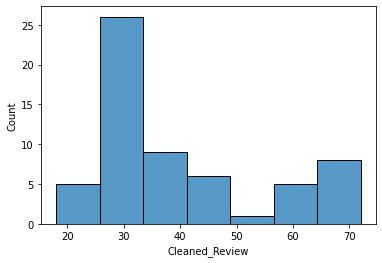

In [12]:
# generate barchart based on word count for cleaned reviews 
df['Cleaned_Review'] = pd.Series([len(item.split()) for item in df['Cleaned_Review']])
sns.histplot(df['Cleaned_Review'])

In [7]:
afn=Afinn()
score = [afn.score(item) for item in df['Cleaned_Review']]
Affin_sentiment = [1 if score > 0 else 0 for score in score]
df['Affin_score'] = score
df['Affin_sentiment'] = Affin_sentiment
df[df['Affin_sentiment'] == 0]['Cleaned_Review']
# run positive wordcloud next

1     awesoome choose location town area u explore c...
3     clean nice room noisy large bed clean unfortun...
19    outdated dissapointe spend night room no make ...
24    outdated dissapointe spend night room no make ...
25    location quite basic reasonably price central ...
27    pretty horrible agree say location inn feature...
28    location not room stay night thing really plac...
29    not bad bit dated couple year stay march doubt...
30    location quite basic reasonably price central ...
32    pretty horrible agree say location inn feature...
33    location not room stay night thing really plac...
34    not bad bit dated couple year stay march doubt...
36    holiday close attraction fillapine market walk...
38    not bad arrive kk mid night leave north early ...
41    holiday close attraction fillapine market walk...
43    not bad arrive kk mid night leave north early ...
46    not bad location nice frienly staff many resta...
51    not bad location nice frienly staff many r

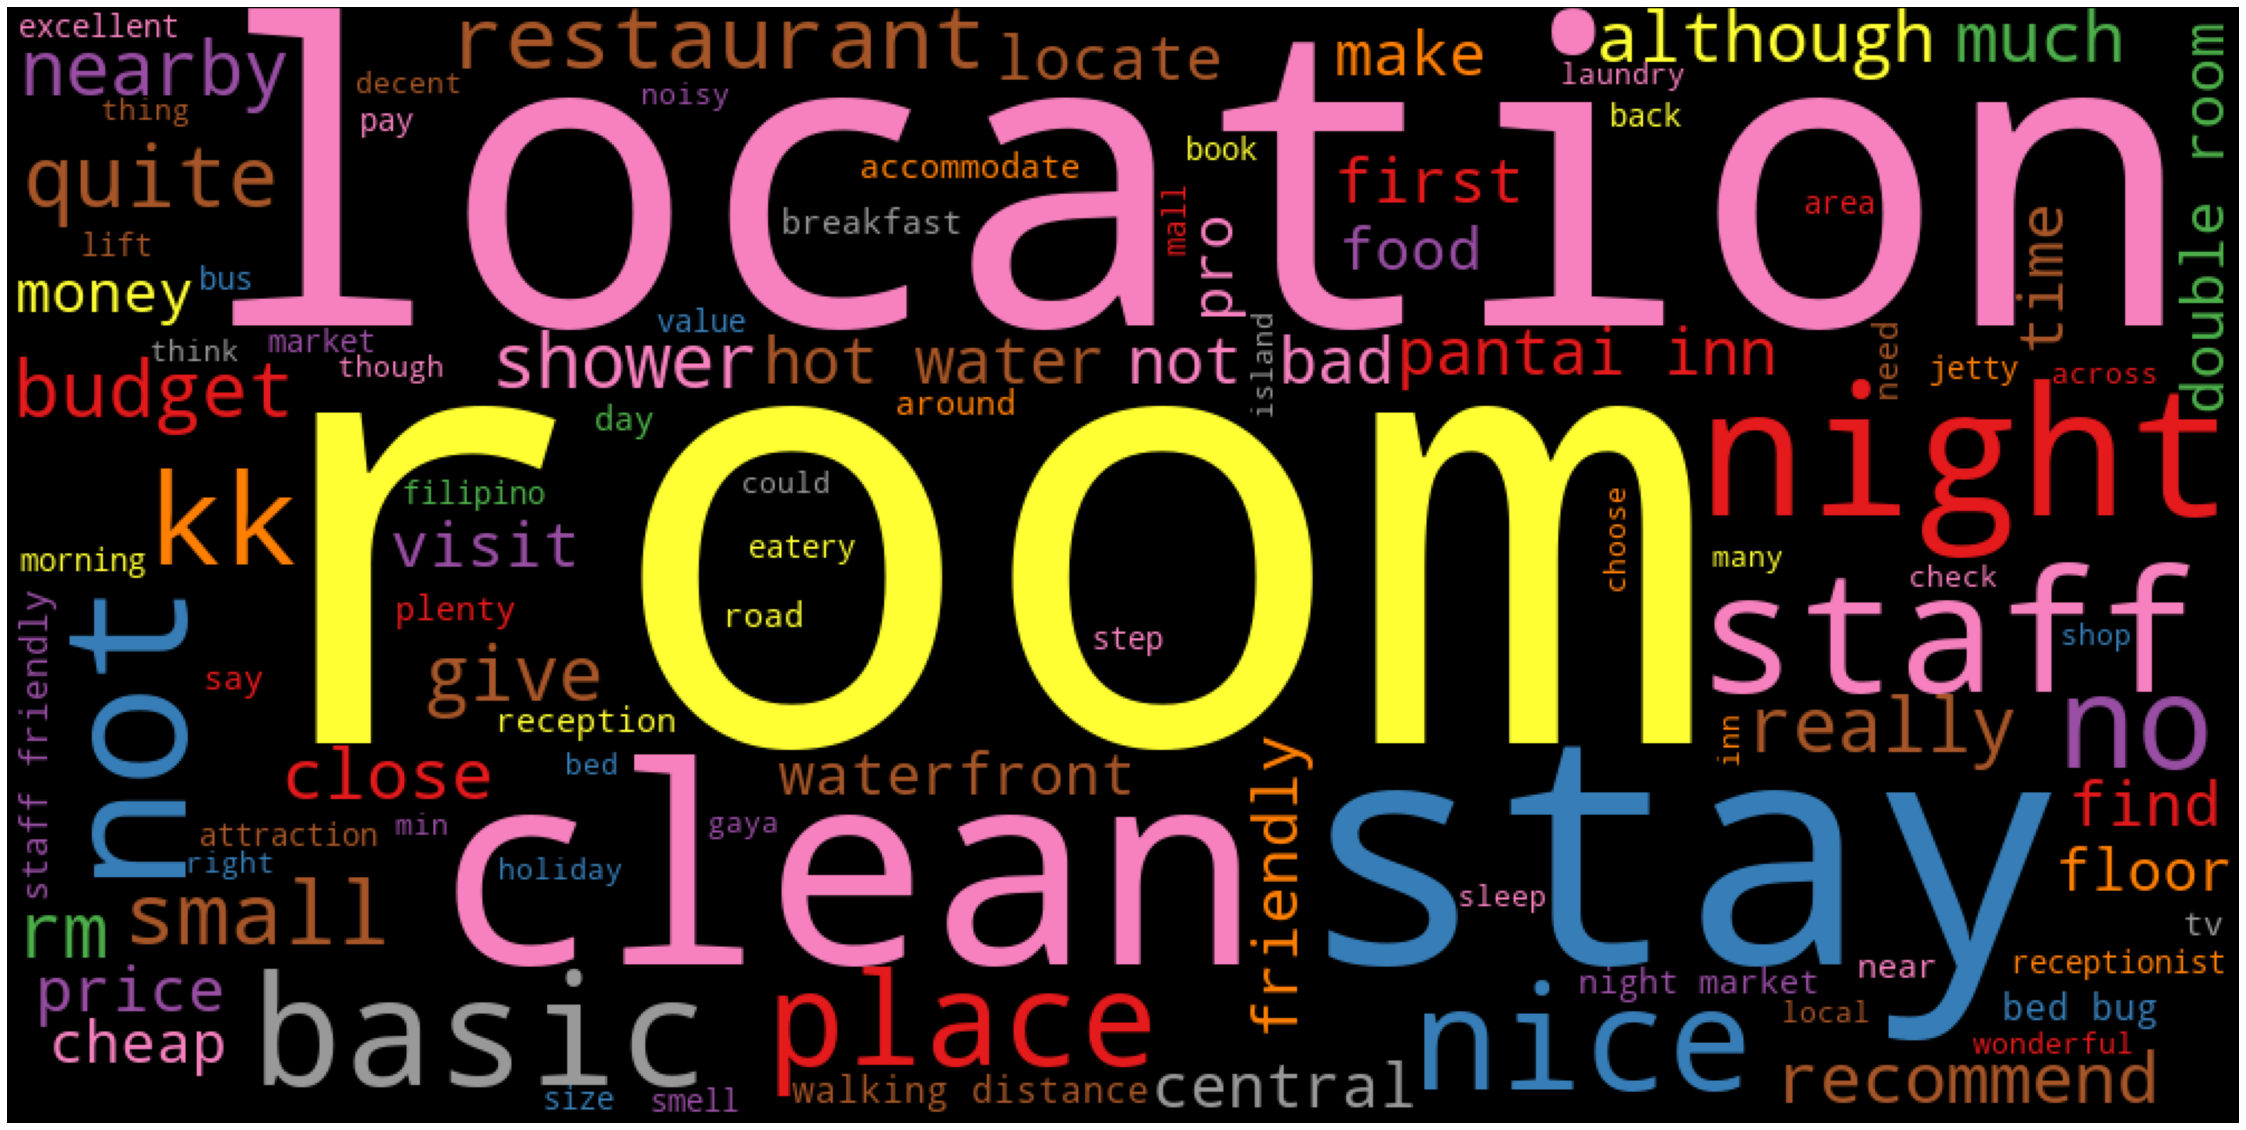

In [8]:
# generate wordcloud based on most frequently typed word in review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set1',
    stopwords=stop_words_,
    max_words=100
).generate(str(reviewtext))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

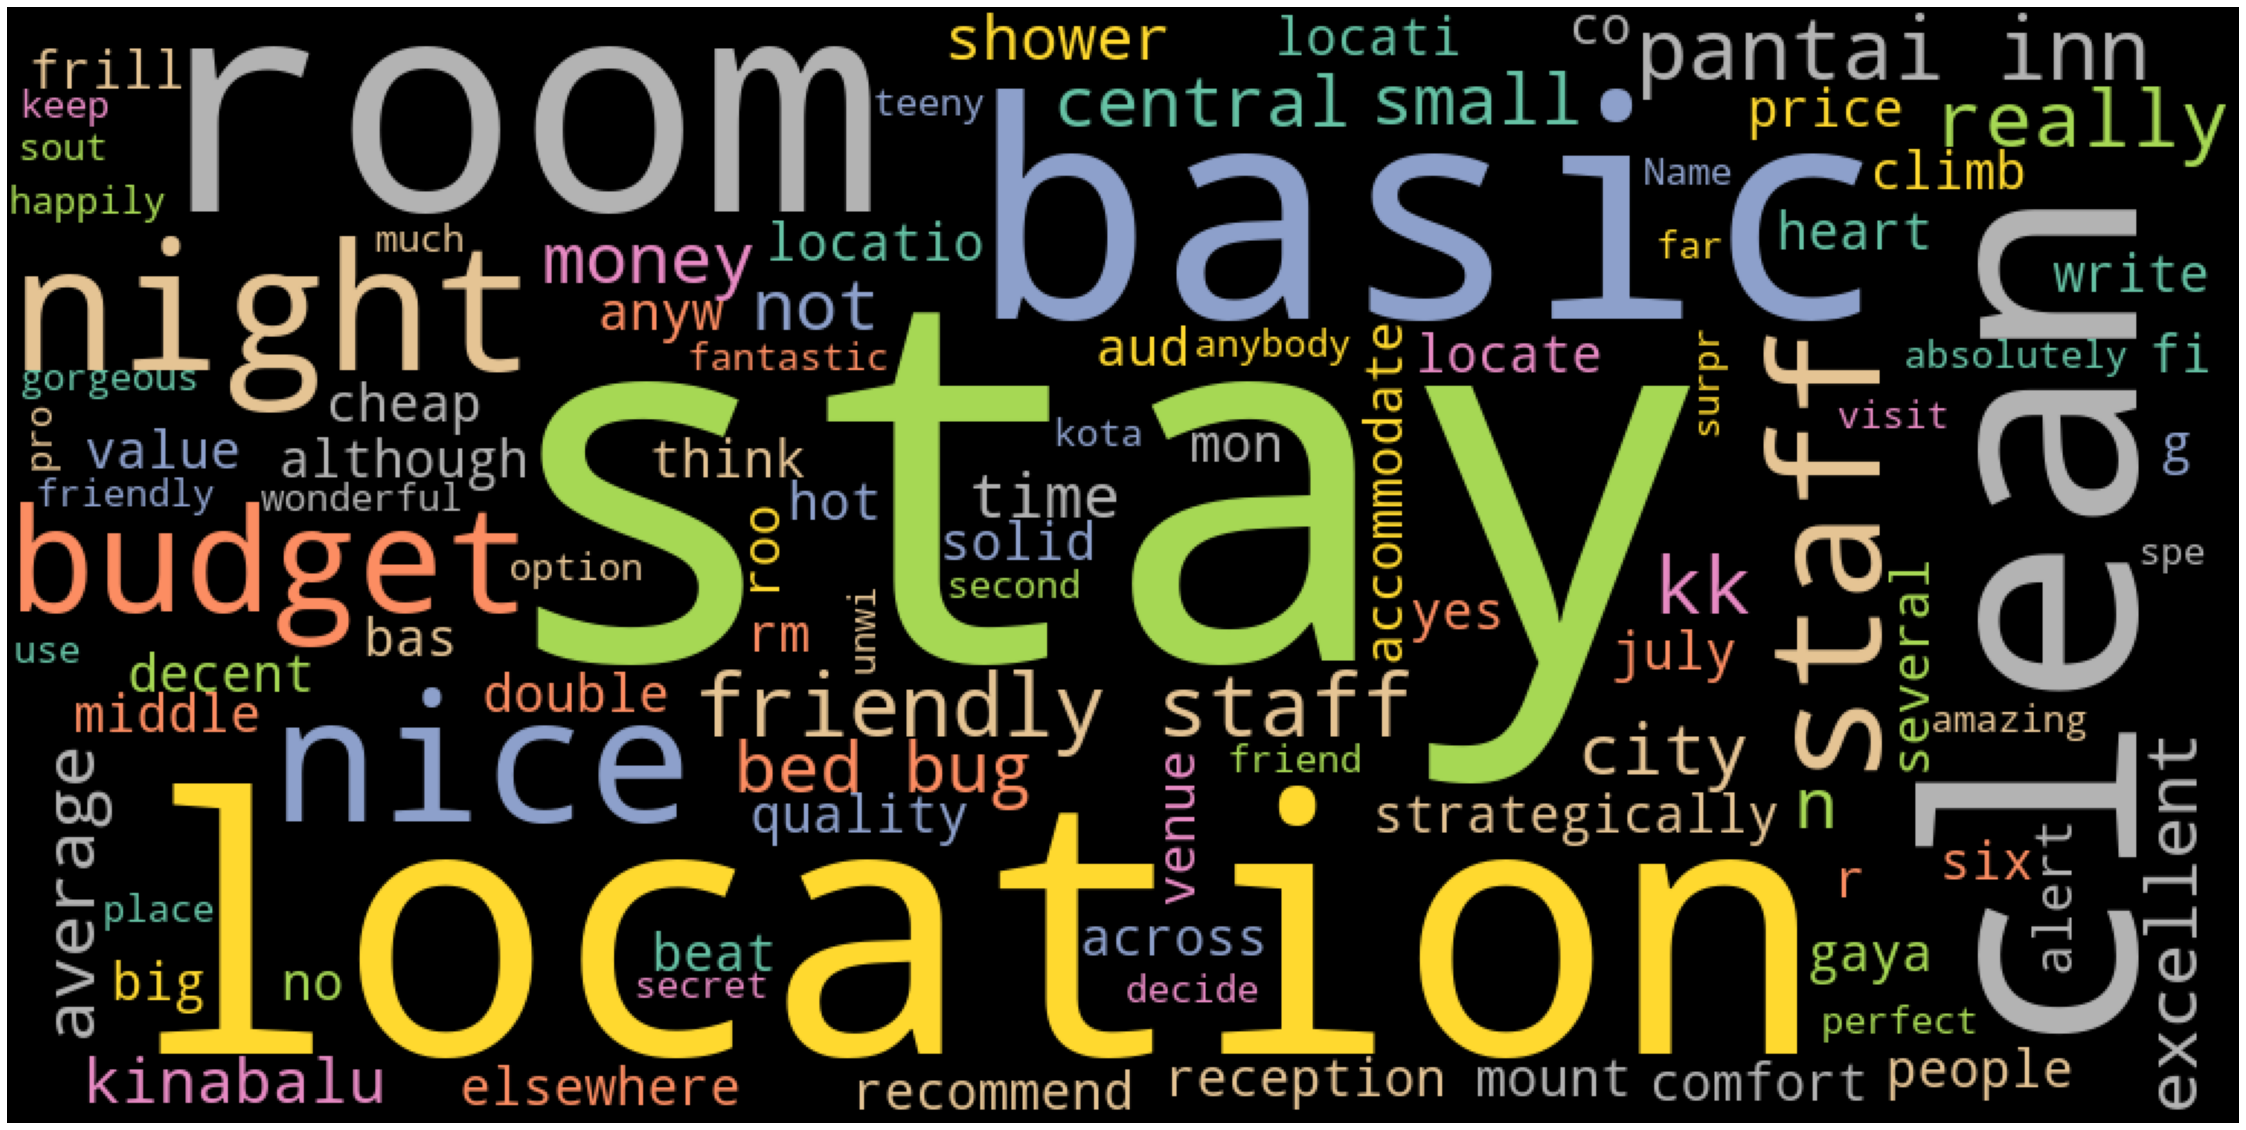

In [9]:
# generate wordcloud based on most frequently typed word in positive sentiment review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set2',
    stopwords=stop_words_,
    max_words=100
).generate(str(df[df['Affin_sentiment'] == 1]['Cleaned_Review']))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
# run afinn again before running this wordcloud
plt.show()

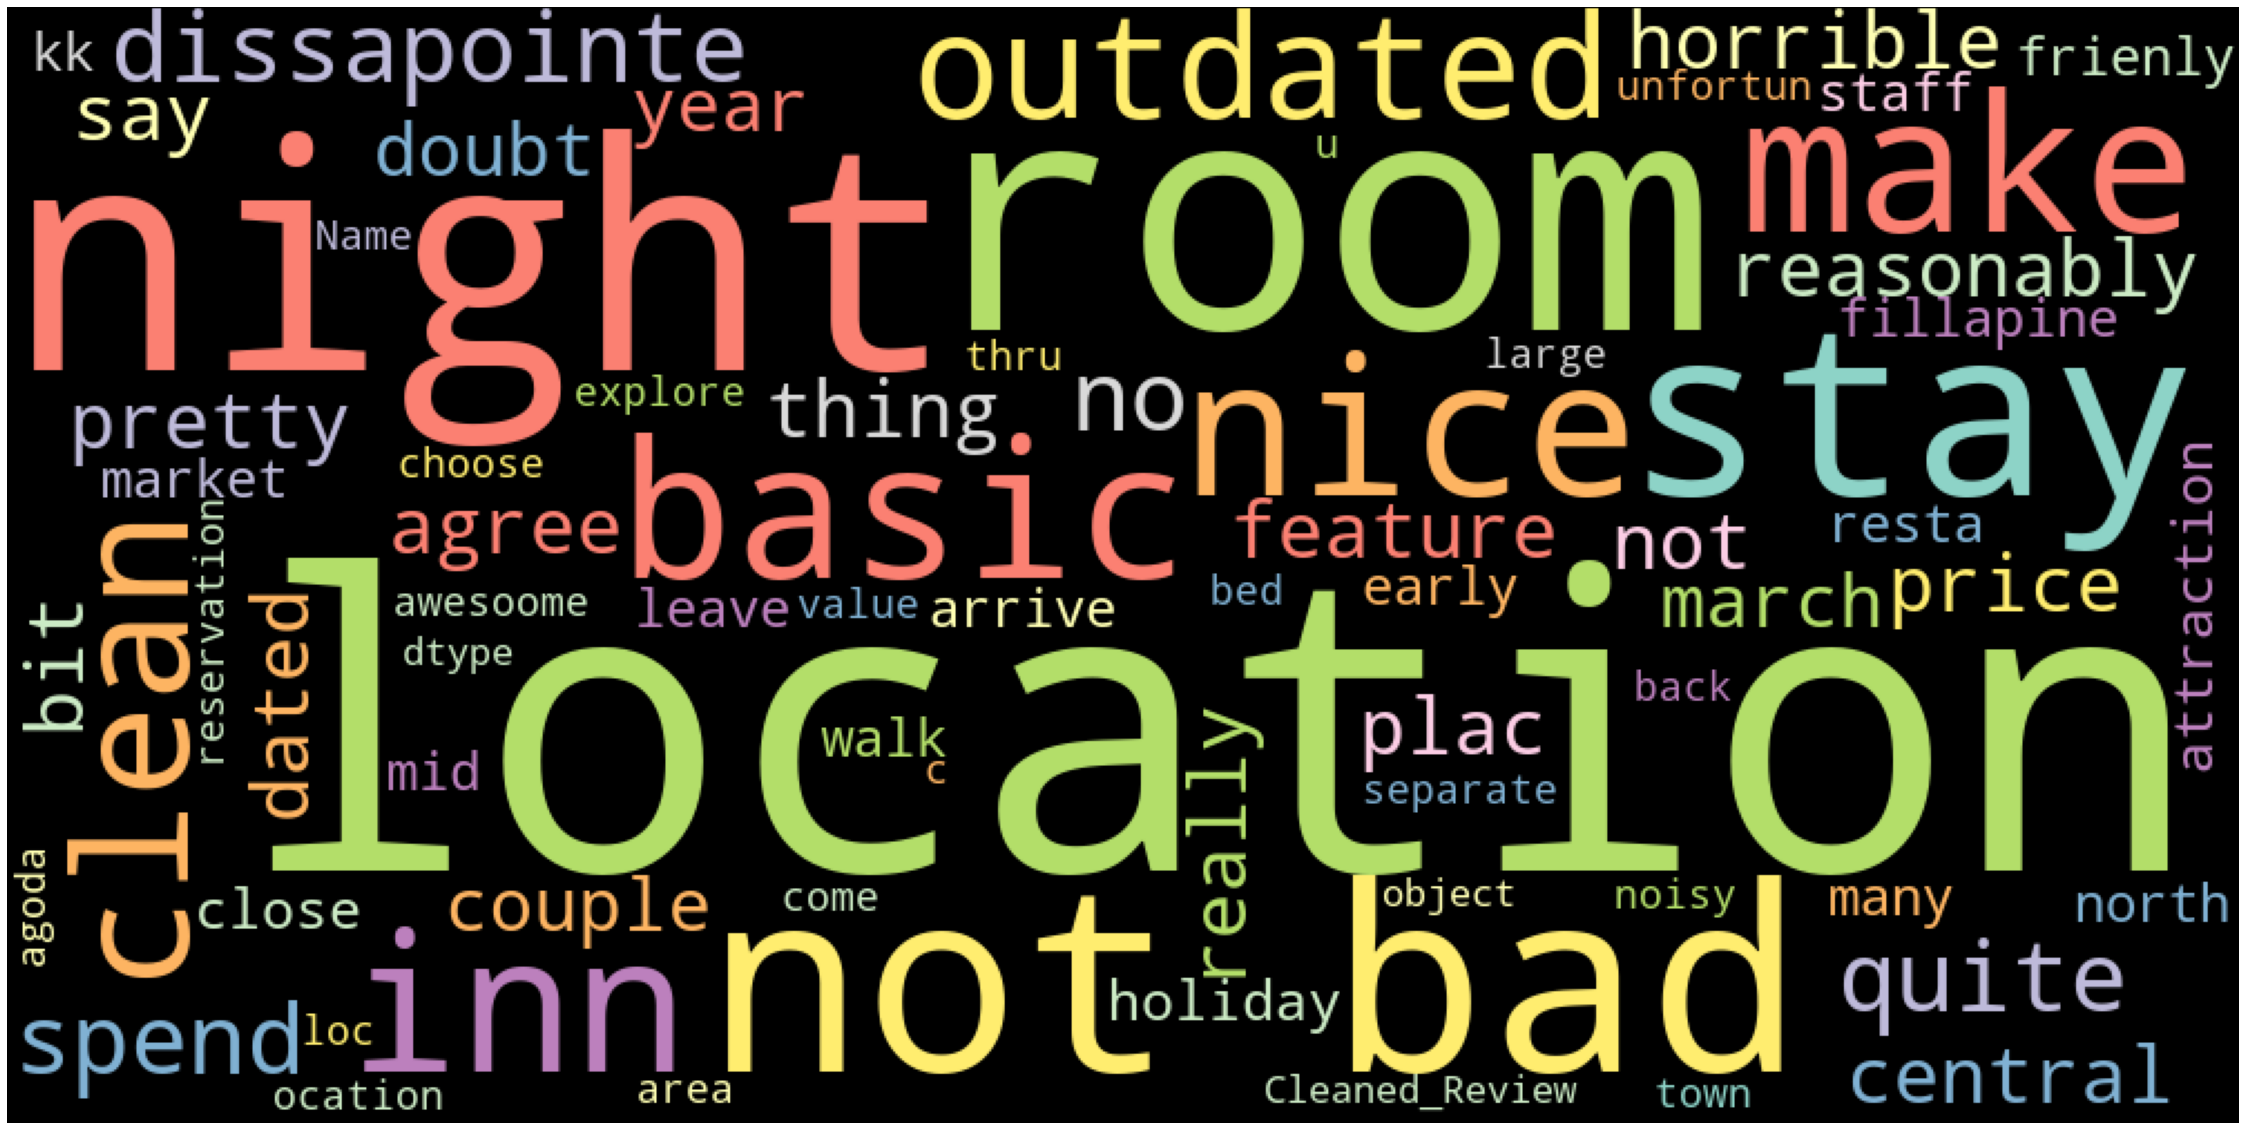

In [10]:
# generate wordcloud based on most frequently typed word in negative sentiment review text
wordcloud = WordCloud(
    width=1000,
    height=500,
    colormap='Set3',
    stopwords=stop_words_,
    max_words=100
).generate(str(df[df['Affin_sentiment'] == 0]['Cleaned_Review']))

plt.figure(figsize=(40, 30))
plt.imshow(wordcloud)
plt.axis('off')
plt.show()

<AxesSubplot:title={'center':'review terms by frequency'}>

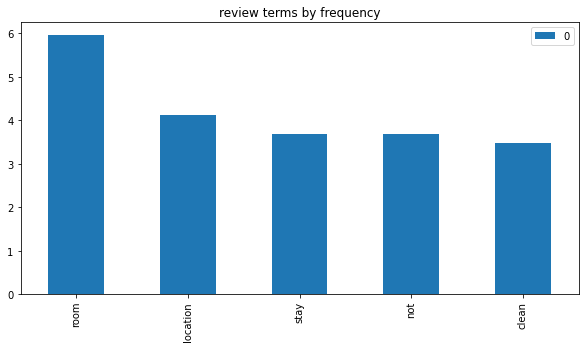

In [11]:
# generate barchart based on review text term frequency
tfidf2 = TfidfVectorizer(norm="l2", analyzer='word', stop_words=stop_words_, ngram_range=(1,1))
tfidf2_x = tfidf2.fit_transform(reviewtext)
termfreq = pd.DataFrame(tfidf2_x.sum(axis=0), columns=tfidf2.get_feature_names()).T.sort_values(0, ascending=False).head()
termfreq.plot(kind='bar', title='review terms by frequency', figsize=(10, 5))

In [8]:
# machine learning model function
def c_matrix(X_train, X_test, y_train, y_test, model):
    # make prediction
    predict_train = model.predict(X_train)
    predict_test = model.predict(X_test)
    # test accuracy
    accuracy_train = model.score(X_train, y_train)
    accuracy_test = model.score(X_test, y_test)
    print('Accuracy for Train set {}'.format(accuracy_train))
    print('Accuracy for Test set {}'.format(accuracy_test))
    # f1 score = 2 * (precision * recall) / (precision + recall)
    f1_score = metrics.f1_score(y_train, predict_train)
    # print 1 can classify observation into correct class vs 0 cannot
    print('F1 Score {}'.format(f1_score))
    print(classification_report(y_test, predict_test))
    plot_confusion_matrix(estimator=model, X=X_test, y_true=y_test, cmap = 'rainbow')
    plt.grid(False)
# oversampling 
# over = SMOTE(sampling_strategy=1, random_state=0)
over = SMOTE(k_neighbors=1)
# convert word token to feature vector for vocab input 
tfidf = TfidfVectorizer(max_features=3000, ngram_range=(1,1))
review_tfidf = tfidf.fit_transform(reviewtext)
X_over, y_over = over.fit_resample(review_tfidf, df['Affin_sentiment'])
X_train, X_test, y_train, y_test = train_test_split(X_over, y_over, random_state=7, test_size=0.20, stratify=y_over)


Accuracy for Train set 1.0
Accuracy for Test set 0.875
F1 Score 1.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.75      0.86         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



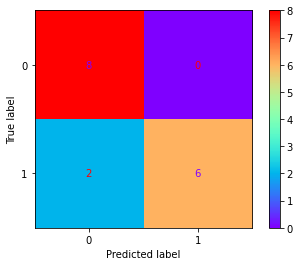

In [9]:
# regression test
model_lr = LogisticRegression(C=5, penalty='l2', random_state=0)
model_lr.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_lr)

Accuracy for Train set 0.96875
Accuracy for Test set 0.625
F1 Score 0.967741935483871
              precision    recall  f1-score   support

           0       0.57      1.00      0.73         8
           1       1.00      0.25      0.40         8

    accuracy                           0.62        16
   macro avg       0.79      0.62      0.56        16
weighted avg       0.79      0.62      0.56        16



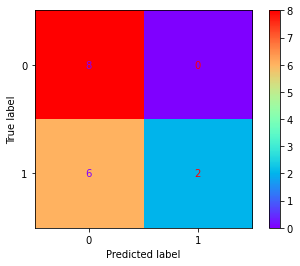

In [11]:
# KNN
model_knn = KNeighborsClassifier(n_neighbors=5, metric='euclidean')
model_knn.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_knn)

Accuracy for Train set 1.0
Accuracy for Test set 0.875
F1 Score 1.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.75      0.86         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



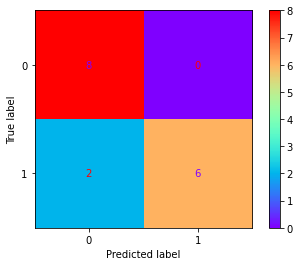

In [12]:
# Naive Bayes
model_naive = MultinomialNB()
model_naive.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_naive)

Accuracy for Train set 1.0
Accuracy for Test set 0.875
F1 Score 1.0
              precision    recall  f1-score   support

           0       0.80      1.00      0.89         8
           1       1.00      0.75      0.86         8

    accuracy                           0.88        16
   macro avg       0.90      0.88      0.87        16
weighted avg       0.90      0.88      0.87        16



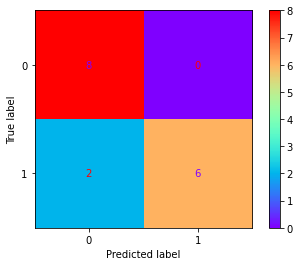

In [13]:
# Support Vector Classifier 
model_svc = SVC(kernel='linear')
model_svc.fit(X_train, y_train)
c_matrix(X_train, X_test, y_train, y_test, model_svc)